In [5]:
import pandas as pd

# Correct path to the CSV file
csv_filename = r'C:\Users\Sdean\PycharmProjects\CONGRESStrading\Stock Data\Term_profits.csv'

# Read the CSV file
Term_profits = pd.read_csv(csv_filename)

# Display the first few rows of the DataFrame
print(Term_profits.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(Term_profits.info())

# Display the number of rows for each term
print("\nRows per term:")
print(Term_profits['Term'].value_counts())

         Term  Trade duration   profits
0  Short term              31 -0.055850
1  Short term              31 -0.063720
2  Short term              31 -0.055666
3  Short term              31 -0.055850
4  Short term              32  0.017907

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Term            3984 non-null   object 
 1   Trade duration  3984 non-null   int64  
 2   profits         3984 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 93.5+ KB
None

Rows per term:
Term
Short term    1328
Mid term      1328
Long term     1328
Name: count, dtype: int64


Mean squared error: 0.08165275247070096
R-squared score: 0.07071781503842434
Coefficient: 0.0005294568646483365
Intercept: -0.013737980732929825


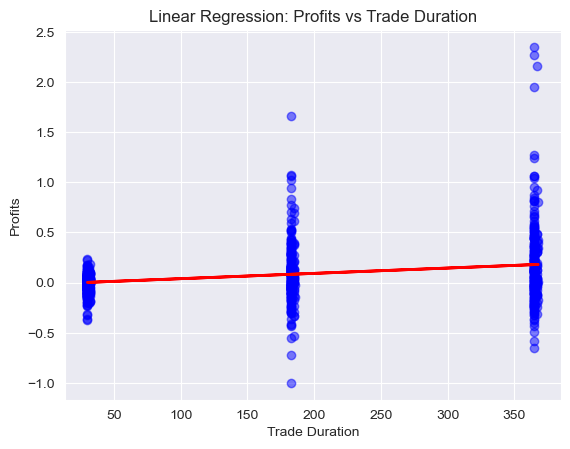

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file
csv_filename = r'C:\Users\Sdean\PycharmProjects\CONGRESStrading\Stock Data\Term_profits.csv'
Term_profits = pd.read_csv(csv_filename)

# Prepare the data
X = Term_profits[['Trade duration']].values
y = Term_profits['profits'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Visualize the results
plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Trade Duration')
plt.ylabel('Profits')
plt.title('Linear Regression: Profits vs Trade Duration')
plt.show()

Lets see if we can get a better mean squared with a single exponetial regression 

Optimal smoothing level: 0.0192
Mean Squared Error: 0.0775
Mean Absolute Error: 0.1725


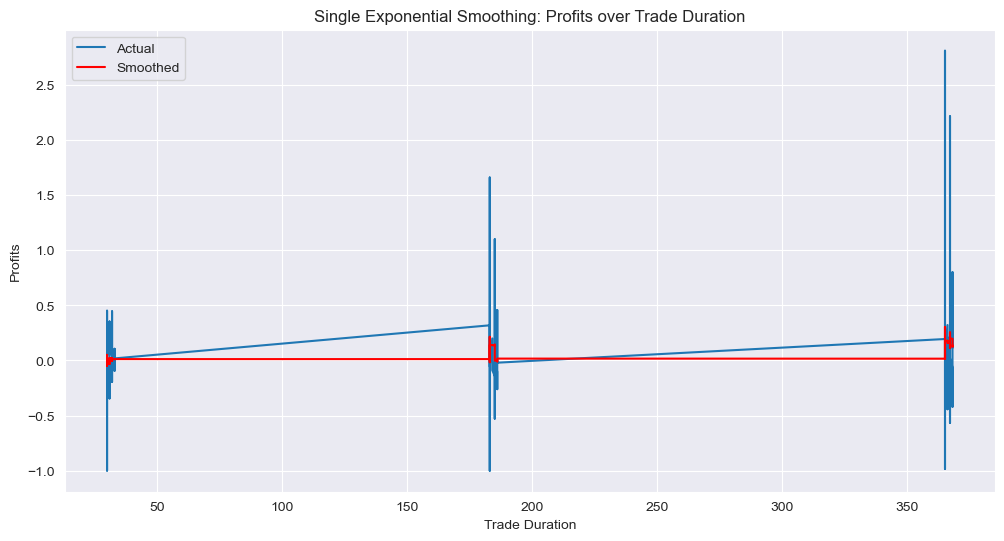

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt


# Ensure the data is sorted by Trade duration
Term_profits = Term_profits.sort_values('Trade duration')

# Prepare the data
y = Term_profits['profits'].values

# Create and fit the model
model = SimpleExpSmoothing(y)
# Fit the model, optimizing the smoothing parameter
fit = model.fit(optimized=True)

# Make predictions
y_hat = fit.fittedvalues

# Calculate error metrics
mse = np.mean((y - y_hat)**2)
mae = np.mean(np.abs(y - y_hat))

print(f"Optimal smoothing level: {fit.params['smoothing_level']:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(Term_profits['Trade duration'], y, label='Actual')
plt.plot(Term_profits['Trade duration'], y_hat, color='red', label='Smoothed')
plt.xlabel('Trade Duration')
plt.ylabel('Profits')
plt.title('Single Exponential Smoothing: Profits over Trade Duration')
plt.legend()
plt.show()



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read the CSV file
csv_filename = r'C:\Users\Sdean\PycharmProjects\CONGRESStrading\Stock Data\Term_profits.csv'
Term_profits = pd.read_csv(csv_filename)

# Calculate mean and standard deviation of profits
mean_profit = Term_profits['profits'].mean()
std_profit = Term_profits['profits'].std()

# Perform Monte Carlo simulation
num_simulations = 10000
simulated_profits = np.random.normal(mean_profit, std_profit, num_simulations)

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(simulated_profits, bins=50, edgecolor='black')
plt.title('Monte Carlo Simulation of Profits')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(np.mean(simulated_profits), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(simulated_profits), color='g', linestyle='dashed', linewidth=2, label='Median')

# Calculate and display 95% confidence interval
ci_lower, ci_upper = np.percentile(simulated_profits, [2.5, 97.5])
plt.axvline(ci_lower, color='orange', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(ci_upper, color='orange', linestyle='dashed', linewidth=2)

plt.legend()

# Save the plot instead of displaying it
plt.savefig('profit_simulation.png')
plt.close()

# Calculate and print summary statistics
print(f"Mean profit: {np.mean(simulated_profits):.2f}")
print(f"Median profit: {np.median(simulated_profits):.2f}")
print(f"95% Confidence Interval: {ci_lower:.2f} to {ci_upper:.2f}")

# Calculate probability of profit > 0
prob_positive = np.mean(simulated_profits > 0)
print(f"Probability of positive profit: {prob_positive:.2%}")

# Calculate Value at Risk (VaR) at 95% confidence level
var_95 = np.percentile(simulated_profits, 5)
print(f"95% Value at Risk: {-var_95:.2f}")

# Perform Shapiro-Wilk test for normality
_, p_value = stats.shapiro(simulated_profits)
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
print("Profit distribution is", "normal" if p_value > 0.05 else "not normal")

Monte carlo on just short term trades 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a new DataFrame with only short-term trades
short_term_trade_profits = Term_profits[Term_profits['Term'] == 'Short term']

# Calculate mean and standard deviation of short-term profits
mean_profit = short_term_trade_profits['profits'].mean()
std_profit = short_term_trade_profits['profits'].std()

# Perform Monte Carlo simulation
num_simulations = 5000
simulated_profits = np.random.normal(mean_profit, std_profit, num_simulations)

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(simulated_profits, bins=50, edgecolor='black')
plt.title('Monte Carlo Simulation of Short-Term Trade Profits')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(np.mean(simulated_profits), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(simulated_profits), color='g', linestyle='dashed', linewidth=2, label='Median')

# Calculate and display 95% confidence interval
ci_lower, ci_upper = np.percentile(simulated_profits, [2.5, 97.5])
plt.axvline(ci_lower, color='orange', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(ci_upper, color='orange', linestyle='dashed', linewidth=2)

plt.legend()

# Save the plot instead of displaying it
plt.savefig('short_term_profit_simulation.png')
plt.close()

# Calculate and print summary statistics
print(f"Number of short-term trades: {len(short_term_trade_profits)}")
print(f"Mean profit: {np.mean(simulated_profits):.2f}")
print(f"Median profit: {np.median(simulated_profits):.2f}")
print(f"95% Confidence Interval: {ci_lower:.2f} to {ci_upper:.2f}")

# Calculate probability of profit > 0
prob_positive = np.mean(simulated_profits > 0)
print(f"Probability of positive profit: {prob_positive:.2%}")

# Calculate Value at Risk (VaR) at 95% confidence level
var_95 = np.percentile(simulated_profits, 5)
print(f"95% Value at Risk: {-var_95:.2f}")

# Perform Shapiro-Wilk test for normality
_, p_value = stats.shapiro(simulated_profits)
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
print("Profit distribution is", "normal" if p_value > 0.05 else "not normal")

# Additional statistics
print(f"Standard Deviation of profits: {np.std(simulated_profits):.2f}")
print(f"Skewness: {stats.skew(simulated_profits):.4f}")
print(f"Kurtosis: {stats.kurtosis(simulated_profits):.4f}")

# Calculate expected shortfall (Conditional VaR)
es_95 = np.mean(simulated_profits[simulated_profits <= var_95])
print(f"95% Expected Shortfall: {-es_95:.2f}")

Number of short-term trades: 1328
Mean profit: -0.00
Median profit: -0.00
95% Confidence Interval: -0.19 to 0.18
Probability of positive profit: 49.46%
95% Value at Risk: 0.16
Shapiro-Wilk test p-value: 0.8515
Profit distribution is normal
Standard Deviation of profits: $0.10
Skewness: -0.0194
Kurtosis: -0.0052
95% Expected Shortfall: 0.20


Monte carlo of 5000 simulated trades for Mid term 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Create a new DataFrame with only mid-term trades
mid_term_trade_profits = Term_profits[Term_profits['Term'] == 'Mid term']

# Calculate mean and standard deviation of mid-term profits
mean_profit = mid_term_trade_profits['profits'].mean()
std_profit = mid_term_trade_profits['profits'].std()

# Perform Monte Carlo simulation
num_simulations = 5000
simulated_profits = np.random.normal(mean_profit, std_profit, num_simulations)

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(simulated_profits, bins=50, edgecolor='black')
plt.title('Monte Carlo Simulation of Mid-Term Trade Profits')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(np.mean(simulated_profits), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(simulated_profits), color='g', linestyle='dashed', linewidth=2, label='Median')

# Calculate and display 95% confidence interval
ci_lower, ci_upper = np.percentile(simulated_profits, [2.5, 97.5])
plt.axvline(ci_lower, color='orange', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(ci_upper, color='orange', linestyle='dashed', linewidth=2)

plt.legend()

# Save the plot instead of displaying it
plt.savefig('mid_term_profit_simulation.png')
plt.close()

# Calculate and print summary statistics
print(f"Number of mid-term trades: {len(mid_term_trade_profits)}")
print(f"Mean profit: {np.mean(simulated_profits):.2f}")
print(f"Median profit: {np.median(simulated_profits):.2f}")
print(f"95% Confidence Interval: {ci_lower:.2f} to {ci_upper:.2f}")

# Calculate probability of profit > 0
prob_positive = np.mean(simulated_profits > 0)
print(f"Probability of positive profit: {prob_positive:.2%}")

# Calculate Value at Risk (VaR) at 95% confidence level
var_95 = np.percentile(simulated_profits, 5)
print(f"95% Value at Risk: {-var_95:.2f}")

# Perform Shapiro-Wilk test for normality
_, p_value = stats.shapiro(simulated_profits)
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
print("Profit distribution is", "normal" if p_value > 0.05 else "not normal")

# Additional statistics
print(f"Standard Deviation of profits: {np.std(simulated_profits):.2f}")
print(f"Skewness: {stats.skew(simulated_profits):.4f}")
print(f"Kurtosis: {stats.kurtosis(simulated_profits):.4f}")

# Calculate expected shortfall (Conditional VaR)
es_95 = np.mean(simulated_profits[simulated_profits <= var_95])
print(f"95% Expected Shortfall: {-es_95:.2f}")

Number of mid-term trades: 1328
Mean profit: 0.08
Median profit: 0.08
95% Confidence Interval: -0.40 to 0.57
Probability of positive profit: 63.06%
95% Value at Risk: 0.32
Shapiro-Wilk test p-value: 0.1771
Profit distribution is normal
Standard Deviation of profits: 0.25
Skewness: -0.0152
Kurtosis: -0.0746
95% Expected Shortfall: 0.42


Long term Monte carlo 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a new DataFrame with only long-term trades
long_term_trade_profits = Term_profits[Term_profits['Term'] == 'Long term']

# Calculate mean and standard deviation of long-term profits
mean_profit = long_term_trade_profits['profits'].mean()
std_profit = long_term_trade_profits['profits'].std()

# Perform Monte Carlo simulation
num_simulations = 5000
simulated_profits = np.random.normal(mean_profit, std_profit, num_simulations)

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(simulated_profits, bins=50, edgecolor='black')
plt.title('Monte Carlo Simulation of Long-Term Trade Profits')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(np.mean(simulated_profits), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(simulated_profits), color='g', linestyle='dashed', linewidth=2, label='Median')

# Calculate and display 95% confidence interval
ci_lower, ci_upper = np.percentile(simulated_profits, [2.5, 97.5])
plt.axvline(ci_lower, color='orange', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(ci_upper, color='orange', linestyle='dashed', linewidth=2)

plt.legend()

# Save the plot instead of displaying it
plt.savefig('long_term_profit_simulation.png')
plt.close()

# Calculate and print summary statistics
print(f"Number of long-term trades: {len(long_term_trade_profits)}")
print(f"Mean profit: {np.mean(simulated_profits):.2f}")
print(f"Median profit: {np.median(simulated_profits):.2f}")
print(f"95% Confidence Interval: {ci_lower:.2f} to {ci_upper:.2f}")

# Calculate probability of profit > 0
prob_positive = np.mean(simulated_profits > 0)
print(f"Probability of positive profit: {prob_positive:.2%}")

# Calculate Value at Risk (VaR) at 95% confidence level
var_95 = np.percentile(simulated_profits, 5)
print(f"95% Value at Risk: {-var_95:.2f}")

# Perform Shapiro-Wilk test for normality
_, p_value = stats.shapiro(simulated_profits)
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
print("Profit distribution is", "normal" if p_value > 0.05 else "not normal")

# Additional statistics
print(f"Standard Deviation of profits: {np.std(simulated_profits):.2f}")
print(f"Skewness: {stats.skew(simulated_profits):.4f}")
print(f"Kurtosis: {stats.kurtosis(simulated_profits):.4f}")

# Calculate expected shortfall (Conditional VaR)
es_95 = np.mean(simulated_profits[simulated_profits <= var_95])
print(f"95% Expected Shortfall: {-es_95:.2f}")

Number of long-term trades: 1328
Mean profit: 0.18
Median profit: 0.18
95% Confidence Interval: -0.62 to 0.98
Probability of positive profit: 67.22%
95% Value at Risk: 0.48
Shapiro-Wilk test p-value: 0.8337
Profit distribution is normal
Standard Deviation of profits: 0.40
Skewness: 0.0060
Kurtosis: 0.0438
95% Expected Shortfall: 0.66
